<a href="https://colab.research.google.com/github/Ryo-yuu/Demo/blob/main/Part_A_Ryoko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# I) EDA
# II) Preprocessing Data
# III) K-Means - Elbow
# IV) K-Means - Model
# V) Conclusion

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path=("/content/sample_data/Mall_Customers.csv")
df = pd.read_csv(path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
#I) Exploratory Data Analysis (EDA)

df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [21]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [22]:
df[df.duplicated()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [23]:
df.value_counts('Gender')

,count
Gender,
Female,112
Male,88


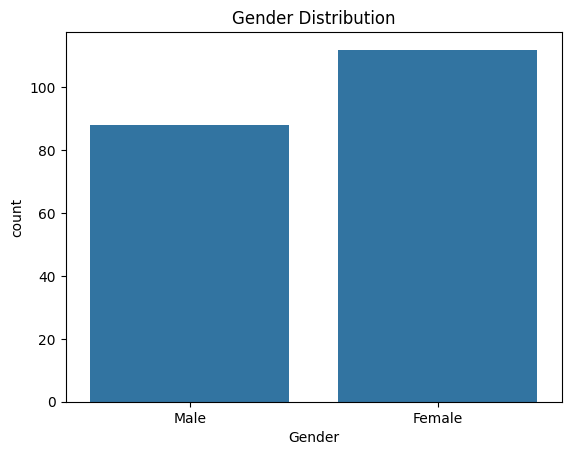

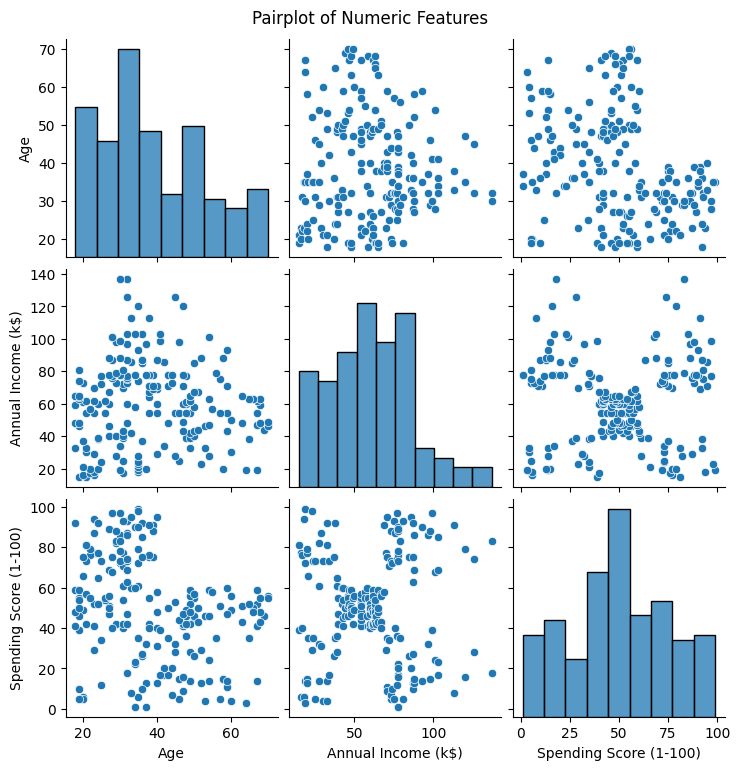

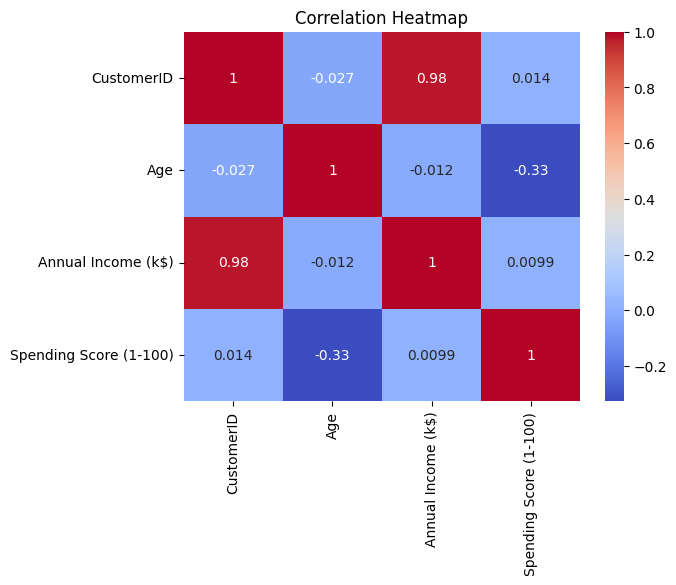

In [24]:
# Visualize gender distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

# Pairplot for numerical features
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

# Correlation matrix
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [25]:
# II) Preprocessing Data
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


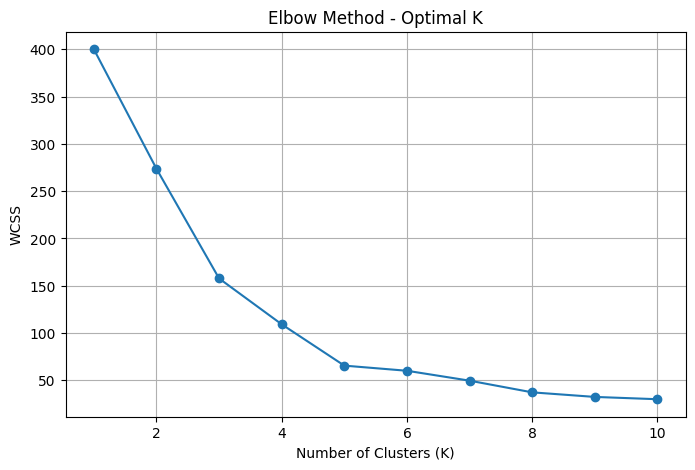

In [26]:
# III) K-Means – Elbow Method

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

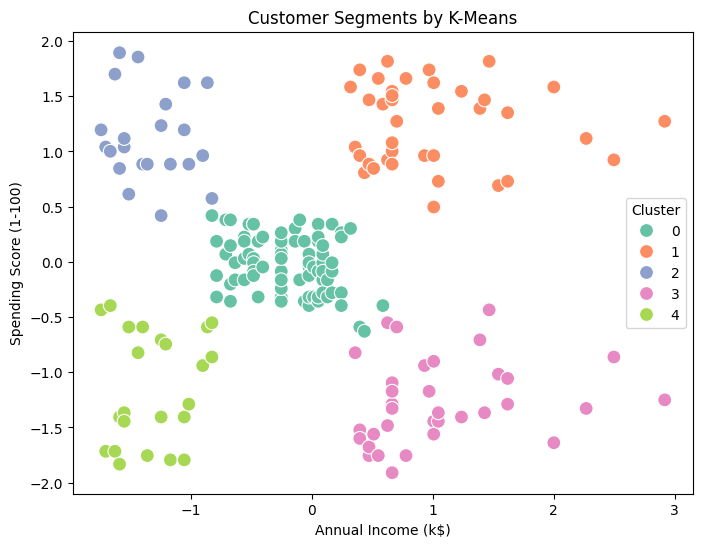

In [27]:
#  IV) K-Means – Model Training and Prediction

# Let's assume optimal K from elbow method is 5
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster to original dataframe
df['Cluster'] = y_kmeans

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_kmeans, palette='Set2', s=100)
plt.title('Customer Segments by K-Means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [28]:
# V) Conclusion

# Summarize clusters
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].mean()
print("Cluster Summary:")
print(cluster_summary)

# Save the clustered data
df.to_csv('mall_customers_segmented.csv', index=False)

Cluster Summary:
         Annual Income (k$)  Spending Score (1-100)        Age
Cluster                                                       
0                 55.296296               49.518519  42.716049
1                 86.538462               82.128205  32.692308
2                 25.727273               79.363636  25.272727
3                 88.200000               17.114286  41.114286
4                 26.304348               20.913043  45.217391


In [30]:
# V) Conclusion
# The clustering analysis grouped mall customers into 5 distinct segments based on Annual Income, Spending Score, and Age.
#1.Cluster 0 – Mid-Income, Moderate Spenders: These are middle-aged, middle-income customers with average spending - Balanced customer group
#2.Cluster 1 – High-Income, High Spenders:These are younger, affluent customers who spend a lot - Premium loyalty programs or high-end products
#3.Cluster 2 – Low-Income, High Spenders:These are younger, budget-conscious shoppers who spend actively despite low income - Targeted to discounts and seasonal offers
#4.Cluster 3 – High-Income, Low Spenders:These are older, high-income customers with low spending behavior - Focus on building trust for Marketing efforts
#5.Cluster 4 – Low-Income, Low Spenders:These customers have limited income and spending - Likely to response low-cost essentials or basic loyalty programs.

# Recomendation: Using thie segmentation to design targeted marketing strategies
# --- Upsell Cluster 1, Retain Cluster 2 with value offers, Engage Cluster 3 with personalized outreach